**Class Imbalance**

---
Oversampling and Undersampling


In [ ]:
# Load dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [ ]:
y.value_counts()

,count
target,
1,357
0,212


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create oversampler object
ros = RandomOverSampler(random_state=42)

# Fit and resample
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Class distribution after oversampling:")
print(y_resampled.value_counts())


Class distribution after oversampling:
target
0    357
1    357
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

print("Class distribution after undersampling:")
print(y_under.value_counts())


Class distribution after undersampling:
target
0    212
1    212
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Class distribution after SMOTE:")
print(y_smote.value_counts())


Class distribution after SMOTE:
target
0    357
1    357
Name: count, dtype: int64


In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X, y)

print("After SMOTE + ENN combination:")
print(y_balanced.value_counts())


After SMOTE + ENN combination:
target
1    314
0    307
Name: count, dtype: int64


Principal Component Analysis (PCA)
1. Introduction

-Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a large set of correlated features into a smaller set of uncorrelated components, while retaining as much information (variance) as possible. It helps simplify complex datasets, speed up training, remove noise, and visualize high-dimensional data.

2. Motivation

Real-world datasets often contain:

- Many features, some of which are highly correlated.

- Redundant information that does not contribute much to model performance.

- Noise, which can confuse machine learning algorithms.

PCA addresses these issues by finding a new coordinate system — the principal components — where:

- The first component captures the maximum variance in the data.

- The second captures the next largest variance, orthogonal to the first, and so on.

Thus, PCA reduces dimensionality while preserving the structure of the data as much as possible.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

print("Original shape:", X_balanced.shape)


Original shape: (621, 30)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)


In [ ]:
# Range of PCA components to test
components = range(1, 31)
accuracies = []

# Loop over possible numbers of components
for k in components:
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)

    model = LogisticRegression(max_iter=1000)
    acc = cross_val_score(model, X_pca, y_balanced, cv=5).mean()
    accuracies.append(acc)


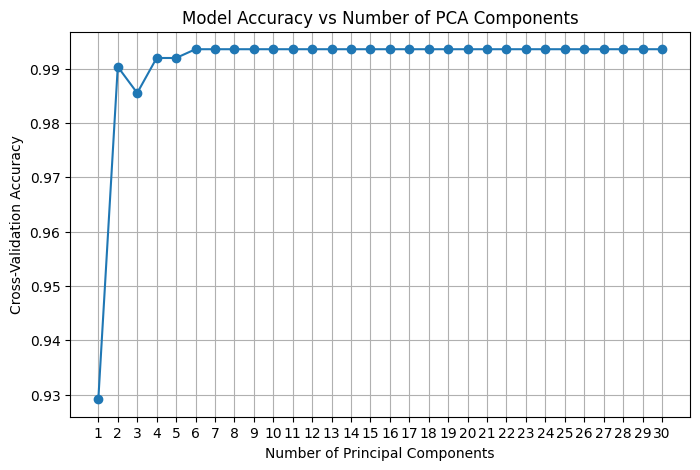

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(components, accuracies, marker='o')
plt.title('Model Accuracy vs Number of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()


In [ ]:
best_k = components[np.argmax(accuracies)]
best_acc = np.max(accuracies)

print(f"Best number of components: {best_k}")
print(f"Highest accuracy: {best_acc:.4f}")


Best number of components: 6
Highest accuracy: 0.9936


In [ ]:
model_raw = LogisticRegression(max_iter=1000)
acc_raw = cross_val_score(model_raw, X_scaled, y_balanced, cv=5).mean()
print(f"Accuracy using all 30 features (no PCA): {acc_raw:.4f}")


Accuracy using all 30 features (no PCA): 0.9936


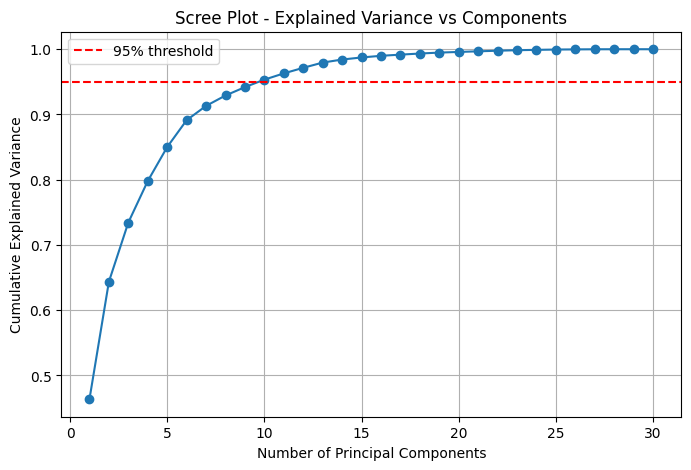

In [ ]:

# Apply PCA without specifying components
pca = PCA()
pca.fit(X_scaled)

# Compute cumulative explained variance
total_var = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(total_var)+1), total_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Explained Variance vs Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.legend()
plt.show()


In [ ]:


pca = PCA().fit(X_scaled)

# Explained variance ratio
var_ratio = pca.explained_variance_ratio_

# Format
for i, var in enumerate(var_ratio):
    print(f"PC{i+1}: {var*100:.2f}% of total variance")



PC1: 46.36% of total variance
PC2: 18.01% of total variance
PC3: 9.07% of total variance
PC4: 6.36% of total variance
PC5: 5.21% of total variance
PC6: 4.12% of total variance
PC7: 2.19% of total variance
PC8: 1.59% of total variance
PC9: 1.28% of total variance
PC10: 1.15% of total variance
PC11: 0.96% of total variance
PC12: 0.86% of total variance
PC13: 0.80% of total variance
PC14: 0.46% of total variance
PC15: 0.32% of total variance
PC16: 0.25% of total variance
PC17: 0.18% of total variance
PC18: 0.17% of total variance
PC19: 0.14% of total variance
PC20: 0.10% of total variance
PC21: 0.10% of total variance
PC22: 0.09% of total variance
PC23: 0.08% of total variance
PC24: 0.05% of total variance
PC25: 0.05% of total variance
PC26: 0.02% of total variance
PC27: 0.02% of total variance
PC28: 0.00% of total variance
PC29: 0.00% of total variance
PC30: 0.00% of total variance


In [ ]:
pca2 = PCA(n_components=0.95)
X_pca2 = pca2.fit_transform(X_scaled)

print("After PCA shape:", X_pca2.shape)

After PCA shape: (621, 10)


In [ ]:
model = LogisticRegression(max_iter=1000)
acc = cross_val_score(model, X_pca2, y_balanced, cv=5).mean()

In [ ]:
print(f"Accuracy using PCA with 95% explained variance: {acc:.4f}")

Accuracy using PCA with 95% explained variance: 0.9936
